In [96]:
#coding:utf-8
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [97]:
#Read excel files
file_stock = "data/各指数PE.xls"
file_bond = "data/十年期国债收益率.xlsx"

#start_time = datetime.datetime(2008, 8, 1)
#end_time = datetime.datetime(2017, 8, 1)
start_time = "2008-08-01"
end_time = "2022-09-23"

#Read data from files
stock =  pd.read_excel(file_stock,sheet_name = None, names=["Code","Name","Date","PE"],dtype={'Code': str, 'Name': str,'PE':np.float64},parse_dates=['Date'],index_col='Date')
bond = pd.read_excel(file_bond,dtype=np.float64,names=["Date","Bond Yield"],parse_dates=['Date'],index_col='Date').sort_index()
bond_reciprocal=bond.rdiv(100)

#Get the data between given interval of time 
stock_interval=stock
for key in stock_interval:
    stock_interval[key]=stock_interval[key].loc[start_time:end_time]

bond_reciprocal_interval=bond_reciprocal.loc[start_time:end_time]

# merge by date indexes to get intersection part of dji and exchange rates
#df_merge=pd.merge(dji_interval,exchange_rate_interval, how='inner', left_index=True, right_index=True)

In [46]:
print(stock_interval)

{'000001.SH':                  Code  Name       PE
Date                                
2008-08-01  000001.SH  上证指数  22.2133
2008-08-04  000001.SH  上证指数  21.7505
2008-08-05  000001.SH  上证指数  21.3697
2008-08-06  000001.SH  上证指数  21.6393
2008-08-07  000001.SH  上证指数  21.6817
...               ...   ...      ...
2017-07-26  000001.SH  上证指数  16.1821
2017-07-27  000001.SH  上证指数  16.1814
2017-07-28  000001.SH  上证指数  16.1996
2017-07-31  000001.SH  上证指数  16.2797
2017-08-01  000001.SH  上证指数  16.3860

[2188 rows x 3 columns], '000016.SH':                  Code  Name       PE
Date                                
2008-08-01  000016.SH  上证50  19.9939
2008-08-04  000016.SH  上证50  19.6053
2008-08-05  000016.SH  上证50  19.3583
2008-08-06  000016.SH  上证50  19.6950
2008-08-07  000016.SH  上证50  19.7279
...               ...   ...      ...
2017-07-26  000016.SH  上证50  11.5466
2017-07-27  000016.SH  上证50  11.5195
2017-07-28  000016.SH  上证50  11.4980
2017-07-31  000016.SH  上证50  11.4919
2017-08-01  000016.SH 

In [35]:
print(bond)

            Bond Yield
Date                  
2022-09-22    2.647500
2022-09-21    2.649200
2022-09-20    2.666900
2022-09-19    2.676800
2022-09-16    2.678800
...                ...
2009-10-26    3.638549
2009-10-23    3.685956
2009-10-22    3.650444
2009-10-21    3.638973
2009-10-20    3.637382

[3086 rows x 1 columns]


In [36]:
print(bond_reciprocal)

            Bond Yield
Date                  
2022-09-22    0.377715
2022-09-21    0.377472
2022-09-20    0.374967
2022-09-19    0.373580
2022-09-16    0.373301
...                ...
2009-10-26    0.274835
2009-10-23    0.271300
2009-10-22    0.273939
2009-10-21    0.274803
2009-10-20    0.274923

[3086 rows x 1 columns]


In [82]:
 print(stock_interval["000688.SH"])

                 Code  Name       PE
Date                                
2020-07-24  000688.SH  科创50  80.8312
2020-07-27  000688.SH  科创50  79.7734
2020-07-31  000688.SH  科创50  86.9439
2020-08-05  000688.SH  科创50  91.2782
2020-08-06  000688.SH  科创50  90.3547
...               ...   ...      ...
2022-09-16  000688.SH  科创50  41.9715
2022-09-19  000688.SH  科创50  41.0334
2022-09-20  000688.SH  科创50  41.5247
2022-09-21  000688.SH  科创50  40.9797
2022-09-22  000688.SH  科创50  41.1694

[523 rows x 3 columns]


上证指数
上证50
沪深300
科创50
中证500


Text(0, 0.5, 'P/E值')

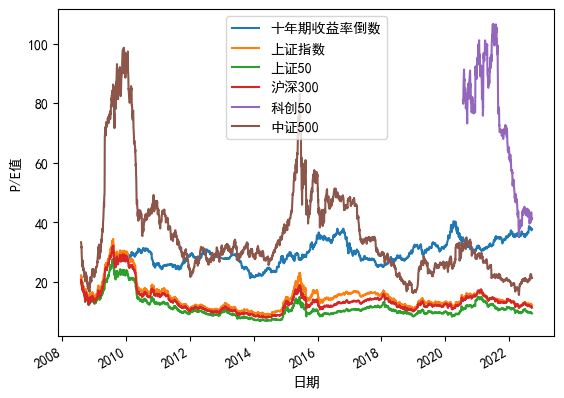

In [101]:
names = []
ax=bond_reciprocal_interval.plot()
names.append('十年期收益率倒数')  
#stock_interval["000001.SH"].plot(ax=ax)
#stock_interval["000016.SH"].plot(ax=ax)


for key in stock_interval:
    stock_interval[key].plot(ax=ax)
    names.append(stock_interval[key].Name.iloc[0]) 
    print(stock_interval[key].Name.iloc[0])

ax.legend(names)
plt.xlabel("日期")
plt.ylabel("P/E值")